In [1]:
import gym, recogym
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None 
# from inspect import getsource
from recogym.evaluate_agent_sale import verify_agents_sale, plot_verify_agents_sale, plot_CR_CTR

# env_1_sale_args is a dictionary of default parameters (i.e. number of products)
from recogym import env_1_sale_args, Configuration
from recogym.envs.utils_sale import (share_states, share_sale, env_infos, count_sales_first_session, 
                                     get_beta_confidence_interval, share_user_with_sale, share_clicks_with_sale)
# You can overwrite environment arguments here:
env_1_sale_args['random_seed'] = 42

# Initialize the gym for the first time by calling .make() and .init_gym()
env = gym.make('reco-gym-sale-v1')
env.init_gym(env_1_sale_args)

# .reset() env before each episode (one episode per user).
env.reset()
done = False
num_products = env_1_sale_args['num_products']

In [2]:
import gym, recogym
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np

# env_2_args is a dictionary of default parameters (i.e. number of products)
from recogym import env_1_sale_args, Configuration
from recogym.envs.utils_sale import share_states, share_sale, env_infos, count_sales_first_session

# You can overwrite environment arguments here:
env_1_sale_args['random_seed'] = 42

# Initialize the gym for the first time by calling .make() and .init_gym()
env = gym.make('reco-gym-sale-v1')
env.init_gym(env_1_sale_args)

# .reset() env before each episode (one episode per user).
env.reset()
done = False
# Counting how many steps.
i = 0
observation, reward, done, info = None, 0, False,{}

while not done:
# while (observation is None) or ((observation is not None) & (len(observation.click)==0 or observation.click[len(observation.click)-1]['c'] != 1)):
    action, observation, reward, done, info = env.step_offline(observation, reward, done, info)
    print(f"Step: {i} - Action: {action} - Observation: {observation.sessions()} - Click:{observation.click} Reward: {reward}")
    i += 1


Step: 0 - Action: None - Observation: [{'t': 0, 'u': 0, 'z': 'pageview', 'v': 0}, {'t': 1, 'u': 0, 'z': 'pageview', 'v': 9}, {'t': 2, 'u': 0, 'z': 'pageview', 'v': 0}, {'t': 3, 'u': 0, 'z': 'pageview', 'v': 0}, {'t': 4, 'u': 0, 'z': 'pageview', 'v': 9}] - Click:[] Reward: 0
Step: 1 - Action: {'t': 5, 'u': 0, 'a': 9, 'ps': 0.1, 'ps-a': ()} - Observation: [] - Click:[{'t': 5, 'u': 0, 'a': 9, 'c': 0}] Reward: 0
Step: 2 - Action: {'t': 6, 'u': 0, 'a': 3, 'ps': 0.1, 'ps-a': ()} - Observation: [] - Click:[{'t': 5, 'u': 0, 'a': 9, 'c': 0}, {'t': 6, 'u': 0, 'a': 3, 'c': 0}] Reward: 0
Step: 3 - Action: {'t': 7, 'u': 0, 'a': 7, 'ps': 0.1, 'ps-a': ()} - Observation: [] - Click:[{'t': 5, 'u': 0, 'a': 9, 'c': 0}, {'t': 6, 'u': 0, 'a': 3, 'c': 0}, {'t': 7, 'u': 0, 'a': 7, 'c': 0}] Reward: 0
Step: 4 - Action: {'t': 8, 'u': 0, 'a': 7, 'ps': 0.1, 'ps-a': ()} - Observation: [] - Click:[{'t': 5, 'u': 0, 'a': 9, 'c': 0}, {'t': 6, 'u': 0, 'a': 3, 'c': 0}, {'t': 7, 'u': 0, 'a': 7, 'c': 0}, {'t': 8, 'u': 0, 

In [2]:
num_users = 100
data = deepcopy(env).generate_logs(num_users)
display(data)
# data.to_csv("generate_logs_test.csv")

Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 19.76it/s]


,t,u,z,v,a,c,r,ps,ps-a
0,0.0,0,organic,1,<NA>,NaN,NaN,NaN,None
1,1.0,0,organic,4,<NA>,NaN,NaN,NaN,None
2,2.0,0,bandit,<NA>,2,0.0,0.0,0.1,()
3,3.0,0,bandit,<NA>,8,0.0,0.0,0.1,()
4,4.0,0,bandit,<NA>,4,0.0,0.0,0.1,()
...,...,...,...,...,...,...,...,...,...
9223,113.0,99,organic,7,<NA>,NaN,NaN,NaN,None
9224,114.0,99,organic,4,<NA>,NaN,NaN,NaN,None
9225,115.0,99,sale,4,<NA>,NaN,NaN,NaN,None
9226,116.0,99,bandit,<NA>,6,0.0,0.0,0.1,()


In [4]:
assert sorted(list(data["v"][data["v"]>=0].unique())) == list(range(num_products))
assert sorted(list(data[data["c"]==1]["a"].unique())) == list(range(num_products))

In [5]:
# Check that we land on the clicked reco in the following organic session
ind = data[data["c"]==1].index[2]
data.iloc[ind:ind+5]

,t,u,z,v,a,c,r,ps,ps-a
678,40.0,7,bandit,<NA>,3,1.0,0.0,0.1,()
679,41.0,7,organic,3,<NA>,NaN,NaN,NaN,None
680,42.0,7,organic,4,<NA>,NaN,NaN,NaN,None
681,43.0,7,organic,4,<NA>,NaN,NaN,NaN,None
682,44.0,7,organic,4,<NA>,NaN,NaN,NaN,None


In [6]:
print(share_states(data))
print("Share of users with at least one sale : ", share_user_with_sale(data))
print("Share of clicks that lead to a sale : ", share_clicks_with_sale(data))
print("\nShare of sales (binary or total) wrt nb bandit events : ",share_sale(data))
print("Share of sales among organic events :", sum(data["z"]=="sale")/sum(data["z"]=="organic"))
print("Number of sales over nb of organic events :", sum(data["r"][data['r']>0])/sum(data["z"]=="organic"))
sales, no_event = count_sales_first_session(data)
print("Share of first organic sessions with sale before reco : ",np.sum(list(sales.values()))/len(data['u'].unique()))

{'organic': 0.23809523809523808, 'bandit': 0.7426406926406927, 'sale': 0.019264069264069265}
Share of users with at least one sale :  0.53
Share of clicks that lead to a sale :  0.26506024096385544

Share of sales (binary or total) wrt nb bandit events :  {'sale_bin': 0.016758962401632178, 'sale_tot': 0.02156805596036141}
Share of sales among organic events : 0.0809090909090909
Number of sales over nb of organic events : 0.06727272727272728
Share of first organic sessions with sale before reco :  0.24


## Stats

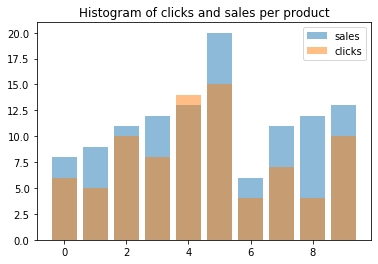

In [7]:
clicked_actions = data[data['z'] == 'bandit'].loc[data['c'] == 1]['a'] 
click_actions, total_clicks = np.unique(clicked_actions, return_counts=True)

rewarded_actions = data[data['z'] == 'bandit'].loc[data['r'] > 0]['a'] 
sale_actions, total_rewards = np.unique(rewarded_actions, return_counts=True)


plt.bar(sale_actions, total_rewards, label = "sales",alpha=0.5)
plt.bar(click_actions, total_clicks, label = "clicks",alpha=0.5)
plt.legend()
plt.title('Histogram of clicks and sales per product')
plt.show()

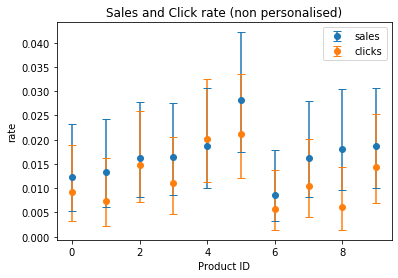

In [8]:
sales = np.zeros(num_products)
sales_tot = np.zeros(num_products)
clicks = np.zeros(num_products)
lower_errors = np.zeros(num_products)
upper_errors = np.zeros(num_products)
LB_errors = np.zeros(num_products)
UB_errors = np.zeros(num_products)
action_counts = np.unique(data[data['z'] == 'bandit']['a'], return_counts=True)[1]
actions = range(num_products)

for product_id in actions:
    n_impressions = action_counts[product_id]
    n_sales = total_rewards[product_id]
    n_clicks = total_clicks[product_id]
    
    lower_bound, upper_bound = get_beta_confidence_interval(n_impressions, n_sales)
    LB, UB = get_beta_confidence_interval(n_impressions, n_clicks)
    
    sales_tot[product_id] = n_sales
    sales[product_id] = n_sales / n_impressions
    clicks[product_id] = n_clicks / n_impressions
    
    lower_errors[product_id] = lower_bound
    upper_errors[product_id] = upper_bound
    
    LB_errors[product_id] = LB
    UB_errors[product_id] = UB

plt.title('Sales and Click rate (non personalised)')

plt.errorbar(
    actions, sales, yerr=(lower_errors, upper_errors),
    fmt='o', capsize=4, label = "sales")

plt.errorbar(
    actions, clicks, yerr=(LB_errors, UB_errors),
    fmt='o', capsize=4, label = "clicks")

plt.xlabel('Product ID')
plt.ylabel('rate')
plt.legend()
plt.show()

In [9]:
import seaborn as sns
product_views =  data[data['z'] == 'organic']['v']
products, views_counts = np.unique(product_views, return_counts=True)

In [10]:
# # With sales / nb recos

# fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# sns.regplot(views_counts, sales, ax=axes[0])
# axes[0].set_title('Sales for number of organic views')
# axes[0].set_xlabel('Number of organic views')
# axes[0].set_ylabel('Sales rate')

# sns.regplot(views_counts, clicks, ax=axes[1])
# axes[1].set_title('Clicks for number of organic views')
# axes[1].set_xlabel('Number of organic views')
# axes[1].set_ylabel('CTR')

# sns.regplot(clicks, sales, ax=axes[2])
# axes[2].set_title('Sales rate as a function of the CTR')
# axes[2].set_xlabel('CTR')
# axes[2].set_ylabel('Nb sales / Nb recos')

# plt.show()

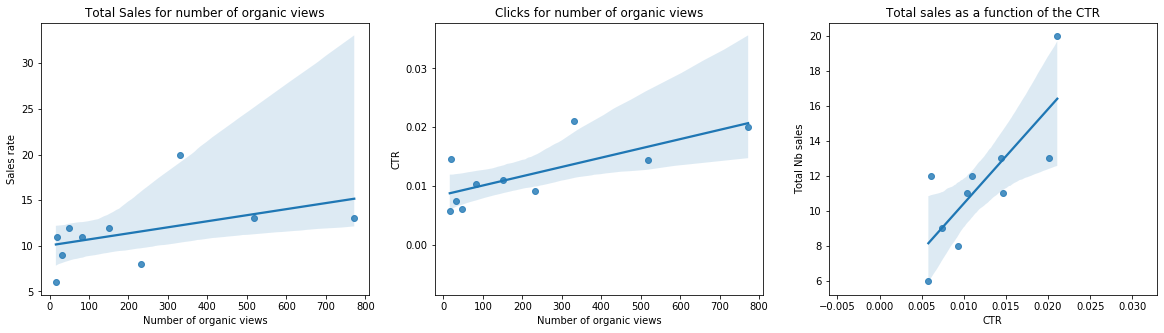

In [11]:
# With total number of sales 

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.regplot(views_counts, sales_tot, ax=axes[0])
axes[0].set_title('Total Sales for number of organic views')
axes[0].set_xlabel('Number of organic views')
axes[0].set_ylabel('Sales rate')

sns.regplot(views_counts, clicks, ax=axes[1])
axes[1].set_title('Clicks for number of organic views')
axes[1].set_xlabel('Number of organic views')
axes[1].set_ylabel('CTR')

sns.regplot(clicks, sales_tot, ax=axes[2])
axes[2].set_title('Total sales as a function of the CTR')
axes[2].set_xlabel('CTR')
axes[2].set_ylabel('Total Nb sales')

plt.show()

## Sales figures for different agents

In [12]:
from recogym.envs.utils_sale import check_sales, PopularityAgent
from recogym.agents import RandomAgent, random_args
from recogym.envs.utils_sale import SingleActionAgent

list_agents = {
    'Random': RandomAgent(Configuration({
    **env_1_sale_args,
    **random_args,
})),

    
#     'Popularity': PopularityAgent(Configuration({
#     **env_1_sale_args,
#     'num_products': num_products,
# })),
    
#     'greedy_bandit' : SingleActionAgent(np.argmax([data["r"][data['a']==a].sum() for a in range(num_products)]), 
#                                   Configuration(env_1_sale_args)),
    
    'greedy_organic' : SingleActionAgent(np.argmax(np.unique(data[data['z'] == 'organic']['v'], return_counts=True)[1]), 
                                   Configuration(env_1_sale_args))
    }

In [13]:
num_online_users = 100
list_perfs = {}
for name,agent in list_agents.items():
    print("====================================================")
    print("-------------------- " + name + " --------------------")
    print("====================================================")
    list_perfs[name] = check_sales(agent, env)
    
#     data = deepcopy(env).generate_logs(num_users, agent = agent)
#     print(share_states(data))
#     print("Share of users with at least one sale : ", share_user_with_sale(data))
#     print("Share of clicks that lead to a sale : ", share_clicks_with_sale(data))
#     print("\nShare of sales (binary or total) wrt nb bandit events : ",share_sale(data))
#     print("Share of sales among organic events :", sum(data["z"]=="sale")/sum(data["z"]=="organic"))
#     print("Number of sales over nb of organic events :", sum(data["r"][data['r']>0])/sum(data["z"]=="organic"))
#     sales, no_event = count_sales_first_session(data)
#     print("Share of first organic sessions with sale before reco : ",np.sum(list(sales.values()))/len(data['u'].unique()))

-------------------- Random --------------------
Total number of sales: 176
Share of sales (Nb sales/Nb recos): 0.0212
-------------------- greedy_organic --------------------
Total number of sales: 175
Share of sales (Nb sales/Nb recos): 0.0240


In [14]:
for name,agent in list_agents.items():
    print("====================================================")
    print("-------------------- " + name + " --------------------")
    print("====================================================")
    
    data = deepcopy(env).generate_logs(num_users, agent = agent)
    print(share_states(data))
    print("Share of users with at least one sale : ", share_user_with_sale(data))
    print("Share of clicks that lead to a sale : ", share_clicks_with_sale(data))
    print("\nShare of sales (binary or total) wrt nb bandit events : ",share_sale(data))
    print("Share of sales among organic events :", sum(data["z"]=="sale")/sum(data["z"]=="organic"))
    print("Number of sales over nb of organic events :", sum(data["r"][data['r']>0])/sum(data["z"]=="organic"))
    sales, no_event = count_sales_first_session(data)
    print("Share of first organic sessions with sale before reco : ",np.sum(list(sales.values()))/len(data['u'].unique()))

Organic Users: 0it [00:00, ?it/s]
Users:   0%|                                                                                   | 0/100 [00:00<?, ?it/s]

-------------------- Random --------------------


Users: 100%|█████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 16.80it/s]


{'organic': 0.2154085334254621, 'bandit': 0.7673173259630334, 'sale': 0.017274140611504576}
Share of users with at least one sale :  0.56
Share of clicks that lead to a sale :  0.21875

Share of sales (binary or total) wrt nb bandit events :  {'sale_bin': 0.014970733903647006, 'sale_tot': 0.01936064835659613}
Share of sales among organic events : 0.08019246190858059
Number of sales over nb of organic events : 0.06896551724137931


Organic Users: 0it [00:00, ?it/s]
Users:   0%|                                                                                   | 0/100 [00:00<?, ?it/s]

Share of first organic sessions with sale before reco :  0.21
-------------------- greedy_organic --------------------


Users: 100%|█████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 17.18it/s]


{'organic': 0.2215542777487367, 'bandit': 0.7583202648545043, 'sale': 0.020125457396759017}
Share of users with at least one sale :  0.6
Share of clicks that lead to a sale :  0.291044776119403

Share of sales (binary or total) wrt nb bandit events :  {'sale_bin': 0.017463235294117647, 'sale_tot': 0.0234375}
Share of sales among organic events : 0.09083759339362957
Number of sales over nb of organic events : 0.08022021234762092
Share of first organic sessions with sale before reco :  0.21


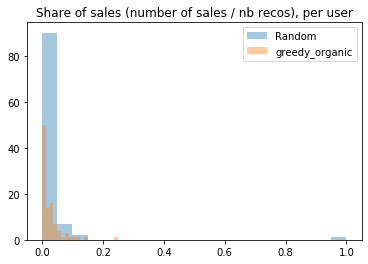

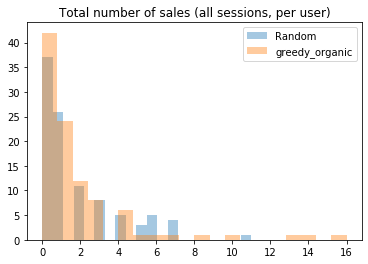

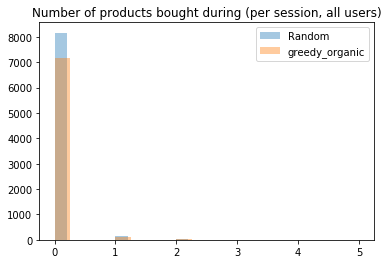

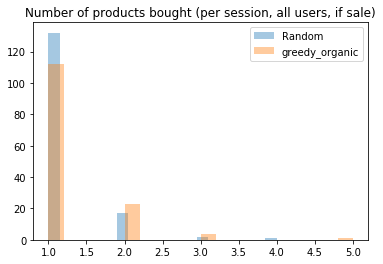

In [15]:
for name,agent in list_agents.items():
    list_sales = list_perfs[name][2]
    # Share of sales for each user (number of sales / recos)
    plt.hist([sum(list_sales[i])/len(list_sales[i]) for i in range(num_online_users)], bins=20, alpha = 0.4, label=name)
    plt.title("Share of sales (number of sales / nb recos), per user")
plt.legend()
plt.show()
    
for name,agent in list_agents.items():
    list_sales = list_perfs[name][2]
    # Total number of sales for a given user
    plt.hist([np.sum(list_sales[i]) for i in range(num_online_users)], bins=20, alpha = 0.4, label=name)
    plt.title("Total number of sales (all sessions, per user)")
plt.legend()
plt.show()
    
for name,agent in list_agents.items():
    list_sales = list_perfs[name][2]
    # Number of products bought
    all_sales = np.array([item for sublist in list_sales for item in sublist])
    plt.hist(all_sales,bins = 20, alpha = 0.4,label=name)
    plt.title("Number of products bought during (per session, all users)")
plt.legend()
plt.show()

for name,agent in list_agents.items():
    list_sales = list_perfs[name][2]
    # Number of products bought
    all_sales = np.array([item for sublist in list_sales for item in sublist])
    plt.hist(all_sales[all_sales>0],bins = 20, alpha = 0.4,label=name)
    plt.title("Number of products bought (per session, all users, if sale)")
plt.legend()
plt.show()

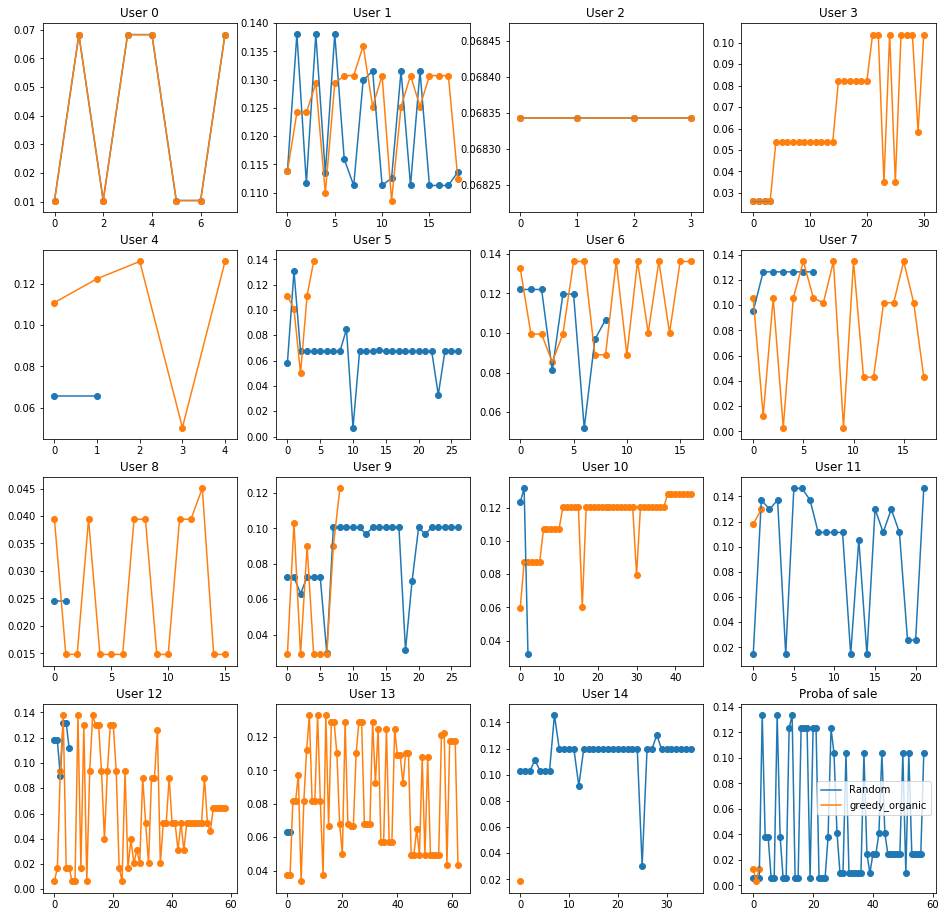

In [16]:
fig, axs = plt.subplots(4, 4, figsize = (16,16))
for i in range(4):
    for j in range(4):
        for name,agent in list_agents.items():
            list_proba_after_scaling = list_perfs[name][4]
            axs[i, j].plot(range(len(list_proba_after_scaling[i*4+j][0])),
                           list_proba_after_scaling[i*4+j][0],
                       label=name)
            axs[i, j].scatter(range(len(list_proba_after_scaling[i*4+j][0])),
                           list_proba_after_scaling[i*4+j][0])
            axs[i,j].set_title("User "+str(i*4+j))
plt.title('Proba of sale')
plt.legend()
plt.show()

In [17]:
# from copy import deepcopy
result = verify_agents_sale(env, 20, list_agents)

Organic Users: 0it [00:00, ?it/s]
Users: 100%|███████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 20.76it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|███████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 20.38it/s]


In [18]:
# # Issue : takes into account all actions... Should only take into account selected actions ?


# user_inits = [env.user_embedding_list[i]["init"] for i in range(len(env.user_embedding_list))]
# user_ends = [env.user_embedding_list[i]["end"] for i in range(len(env.user_embedding_list))]
# plt.scatter([ff(user_inits[i][:,0]@env.beta[a,:]) for a in range(num_products) for i in range(len(user_inits))],
#             [env.config.psale_scale*sig(user_inits[i][:,0]@env.Lambda[a,:]) for a in range(num_products) for i in range(len(user_inits))], 
#             alpha=0.3, label='init')
# plt.scatter([ff(user_ends[i][:,0]@env.beta[a,:]) for a in range(num_products) for i in range(len(user_inits))],
#             [env.config.psale_scale*sig(user_ends[i][:,0]@env.Lambda[a,:]) for a in range(num_products) for i in range(len(user_inits))], 
#             alpha=0.3,label='end')
# plt.legend()
# plt.show()

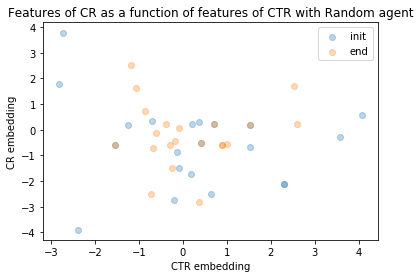

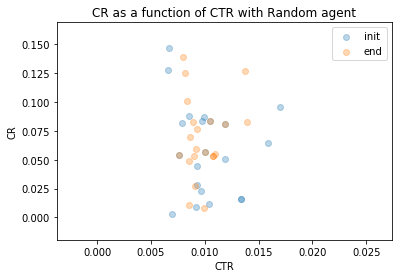

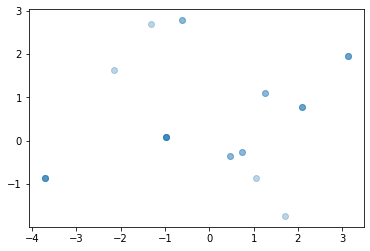

In [19]:
from recogym.envs.reco_env_v1_sale import ff, sig
plot_CR_CTR(agent="Random",result=result)
try :
    plot_CR_CTR(agent="greedy_organic",result=result)
except :
    None

### test training agents

In [5]:
from recogym.agents.sale_agent import CountViewsFeatureProvider
v_feature = CountViewsFeatureProvider(env.config)


from recogym.agents.sale_agent import ClickRewardProvider, MDPRewardProvider, build_train_data
MDP_rewards_all = MDPRewardProvider(clicks_only=False)
click_reward = ClickRewardProvider()




In [6]:
from recogym.agents import RandomAgent, random_args
random_agent = RandomAgent(Configuration(random_args))

from recogym.agents.sale_agent import SaleLikelihoodAgent
likelihood_logreg_click = SaleLikelihoodAgent(v_feature, click_reward)
likelihood_logreg_click.train(data)
likelihood_logreg_mdp_all = SaleLikelihoodAgent(v_feature, MDP_rewards_all)
likelihood_logreg_mdp_all.train(data)

In [7]:
res_all_test=verify_agents_sale(
    env,
    number_of_users=100,
    agents={
        'random agent' : random_agent,
        'click' : likelihood_logreg_click,
        'likelihood MDP all': likelihood_logreg_mdp_all
    }
)

Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.86it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████████| 100/100 [01:40<00:00,  1.01s/it]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████████| 100/100 [01:38<00:00,  1.01it/s]


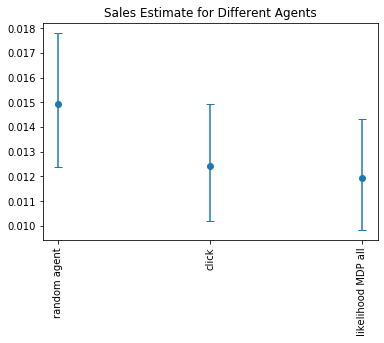

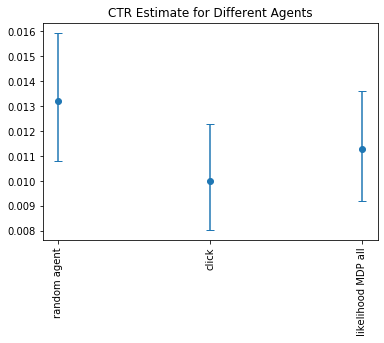

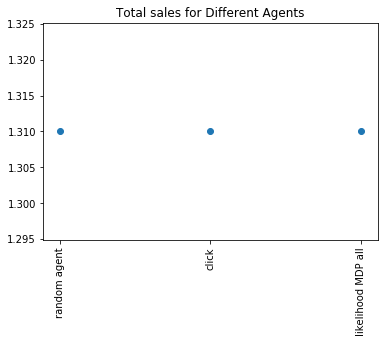

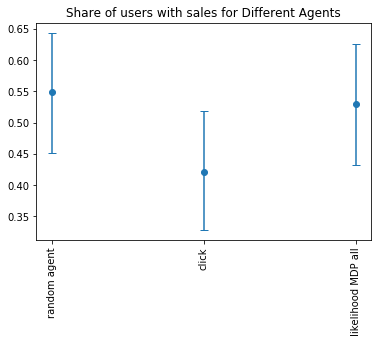

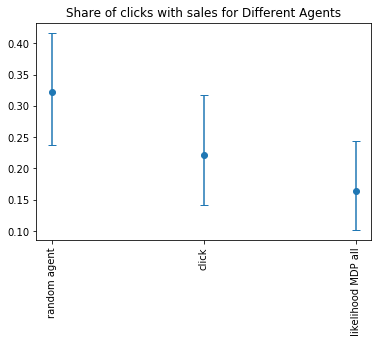

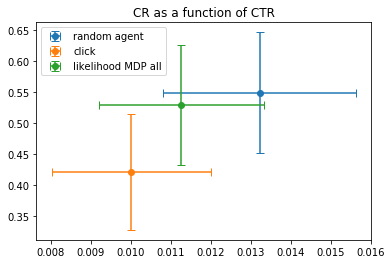

In [8]:
res = res_all_test
plot_verify_agents_sale(res["sale rate"], res["CTR"], res["Tot sales"], 
                        res['Share user with sale'], res['Share sale after click'],
                       res["User embeddings"])
None